In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv('C:\\Users\\aahsa\\Downloads\\clean_Recipes.csv')

In [3]:
df.head()

,RecipeId,Name,AuthorId,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,AuthorName
0,38,Low-Fat Berry Blue Frozen Dessert,1533,86400.0,2700,89100,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,1.0,Dancer
1,39,Biryani,1567,1500.0,14400,15900,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,1.0,elly9812
2,40,Best Lemonade,1566,300.0,1800,2100,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,1.0,Stephen Little
3,41,Carina's Tofu-Vegetable Kebabs,1586,1200.0,86400,87600,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,Cyclopz
4,42,Cabbage Soup,1538,1800.0,1200,3000,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,1.0,Duckie067


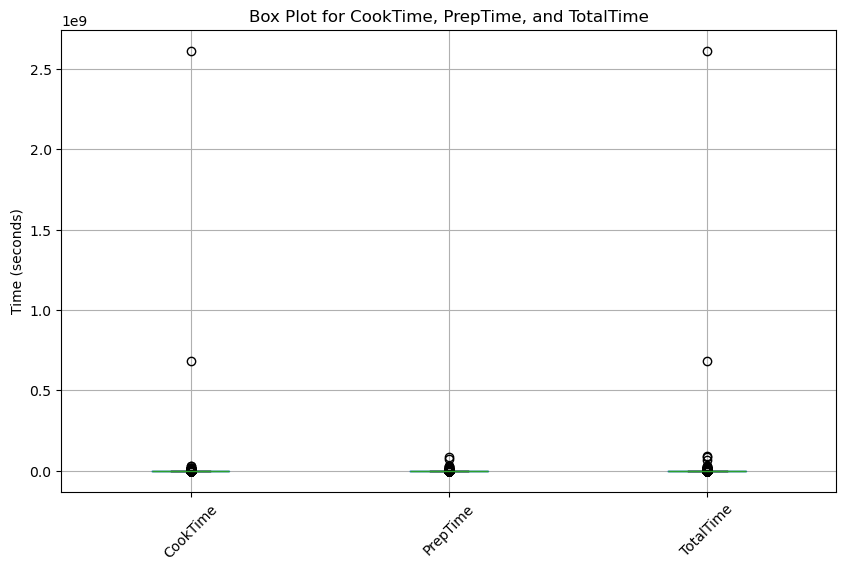

In [5]:
# Create a box plot for the specified columns 
plt.figure(figsize=(10, 6)) 
df[['CookTime', 'PrepTime', 'TotalTime']].boxplot() 
plt.title('Box Plot for CookTime, PrepTime, and TotalTime') 
plt.ylabel('Time (seconds)') 
plt.xticks(rotation=45) 
plt.show()


In [7]:
# Function to identify outliers using IQR
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Identify outliers in CookTime and TotalTime
cooktime_outliers = find_outliers(df['CookTime'])
totaltime_outliers = find_outliers(df['TotalTime'])

print("CookTime Outliers:")
print(cooktime_outliers)
print("\nTotalTime Outliers:")
print(totaltime_outliers)


CookTime Outliers:
0         86400.0
5          7200.0
17         7200.0
20         8040.0
29         9480.0
           ...   
522486    14400.0
522492     7200.0
522510    10800.0
522513    10800.0
522514    10800.0
Name: CookTime, Length: 46111, dtype: float64

TotalTime Outliers:
0         89100
1         15900
3         87600
20         9840
29        11580
          ...  
522486    17100
522492    14400
522510    12000
522513    12600
522514    14400
Name: TotalTime, Length: 48119, dtype: int64


In [9]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in CookTime and TotalTime
df_cleaned = remove_outliers(df, 'CookTime')
df_cleaned = remove_outliers(df_cleaned, 'PrepTime')
df_cleaned = remove_outliers(df_cleaned, 'TotalTime')

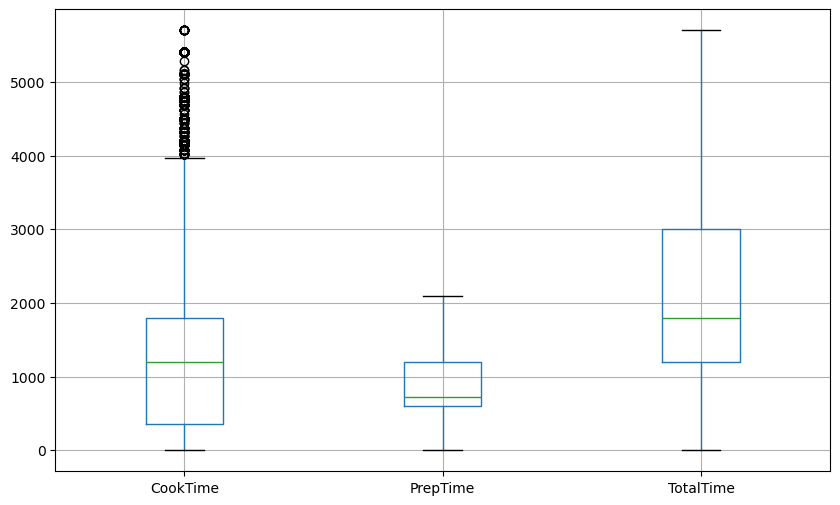

In [11]:
plt.figure(figsize=(10, 6)) 
df_cleaned[['CookTime', 'PrepTime', 'TotalTime']].boxplot() 
plt.show()

In [13]:
df_cleaned = df_cleaned[df_cleaned['CookTime'] <= 4000]

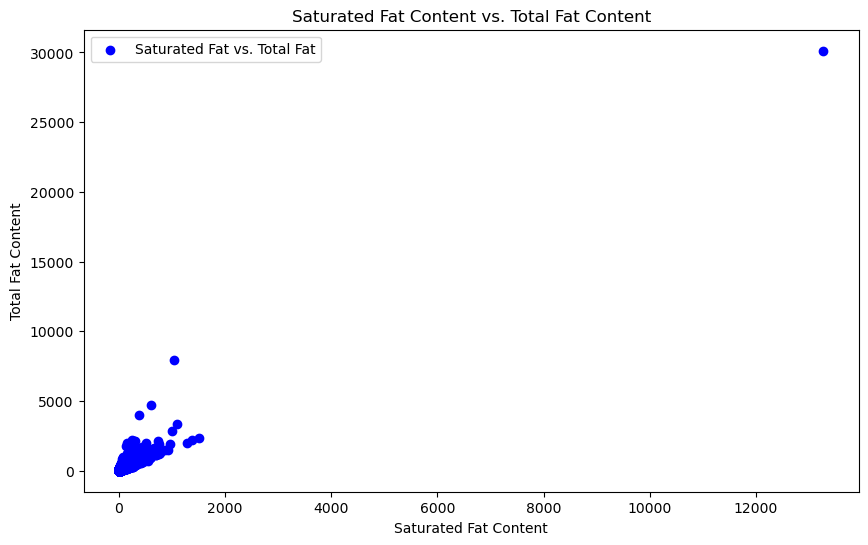

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['SaturatedFatContent'], df_cleaned['FatContent'], color='blue', label='Saturated Fat vs. Total Fat')
plt.title('Saturated Fat Content vs. Total Fat Content')
plt.xlabel('Saturated Fat Content')
plt.ylabel('Total Fat Content')
plt.legend()
plt.show()


In [15]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in SaturatedFatContent and FatContent
df_cleaned = remove_outliers(df, 'SaturatedFatContent')
df_cleaned = remove_outliers(df_cleaned, 'FatContent')

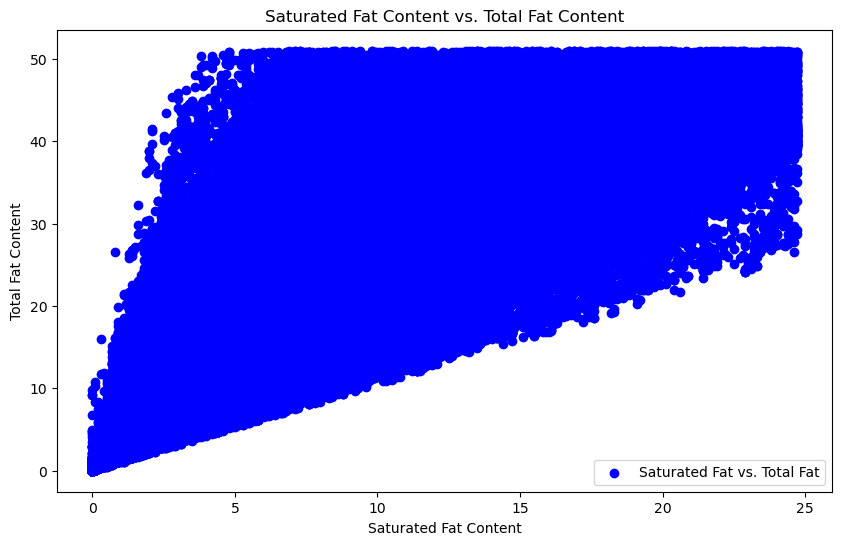

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['SaturatedFatContent'], df_cleaned['FatContent'], color='blue', label='Saturated Fat vs. Total Fat')
plt.title('Saturated Fat Content vs. Total Fat Content')
plt.xlabel('Saturated Fat Content')
plt.ylabel('Total Fat Content')
plt.legend()
plt.show()

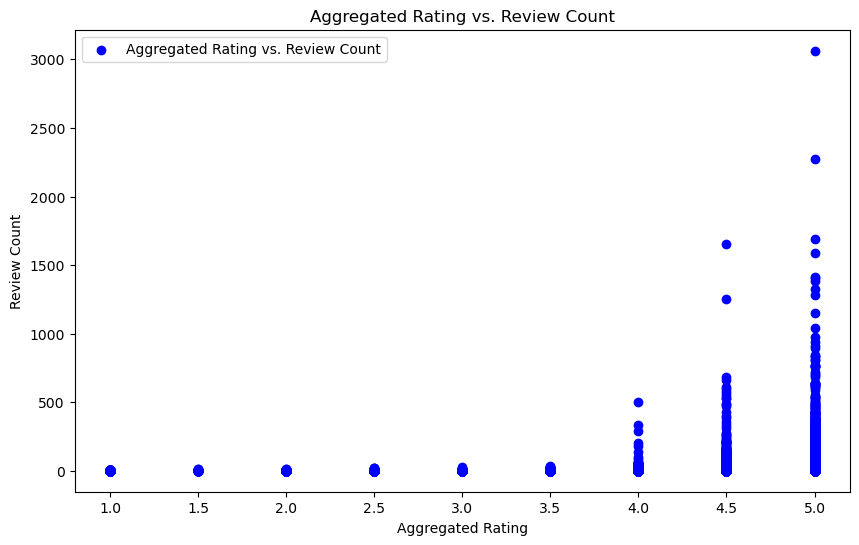

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AggregatedRating'], df_cleaned['ReviewCount'], color='blue', label='Aggregated Rating vs. Review Count')
plt.title('Aggregated Rating vs. Review Count')
plt.xlabel('Aggregated Rating')
plt.ylabel('Review Count')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Box plot of Sodium Content')

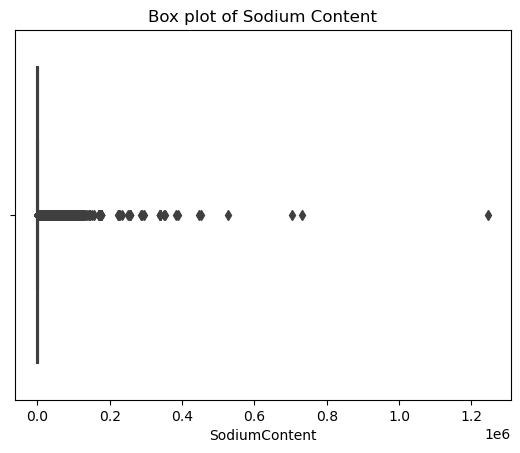

In [20]:
#Check outlier for SodiumContent
sns.boxplot(x=df['SodiumContent']) 
plt.title('Box plot of Sodium Content')

In [21]:
#Removing outliers for all the nutrition values
import pandas as pd

# Assuming your DataFrame is named df
columns = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 
           'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Text(0.5, 1.0, 'Box plot of Sodium Content')

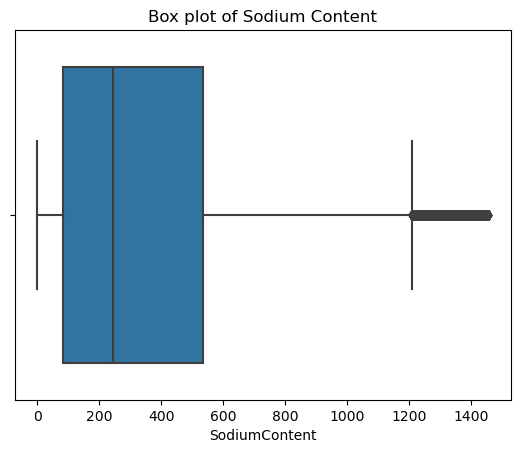

In [22]:
#check if Removing outliers for the Sodium content worked:
sns.boxplot(x=df['SodiumContent']) 
plt.title('Box plot of Sodium Content')

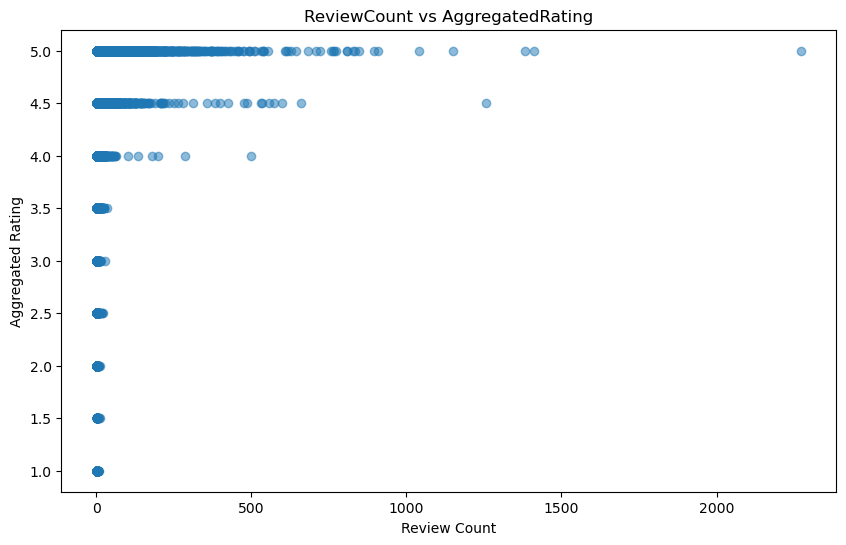

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ReviewCount'], df['AggregatedRating'], alpha=0.5)
plt.title('ReviewCount vs AggregatedRating')
plt.xlabel('Review Count')
plt.ylabel('Aggregated Rating')
plt.show()

In [24]:
df.to_csv('cleaned_Recipes.csv', index=False)